In [1]:
# Core
import numpy as np
import pandas as pd

# Astronomy
import rebound

# Statistics
from scipy.stats import norm, beta
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.mixture import GaussianMixture

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
# from IPython.display import Image

# MSE imports
import kepler_sieve
from asteroid_element import load_ast_elt
from candidate_element import random_elts
from planets import make_sim_planets
from astro_utils import mjd_to_datetime

In [2]:
# Set plot style variables
mpl.rcParams['figure.figsize'] = [16.0, 10.0]
mpl.rcParams['font.size'] = 16

In [3]:
# Load orbital elements for known asteroids
ast_elt = load_ast_elt()

# Number of asteroids
N_ast = ast_elt.shape[0]

In [4]:
ast_elt

,Num,Name,epoch,a,e,inc,Omega,omega,M,H,G,Ref,f,P,n,long,theta,pomega,T_peri
Num,,,,,,,,,,,,,,,,,,,
1,1,Ceres,58600.0,2.769165,0.076009,0.184901,1.401596,1.284522,1.350398,3.34,0.12,JPL 46,1.501306,1683.145749,0.003733,4.036516,4.187424,2.686118,-361.745873
2,2,Pallas,58600.0,2.772466,0.230337,0.608007,3.020817,5.411373,1.041946,4.13,0.11,JPL 35,1.490912,1686.155979,0.003726,3.190951,3.639917,2.149005,-279.616804
3,3,Juno,58600.0,2.669150,0.256942,0.226699,2.964490,4.330836,0.609557,5.33,0.32,JPL 108,0.996719,1592.787270,0.003945,1.621697,2.008860,1.012141,-154.522558
4,4,Vesta,58600.0,2.361418,0.088721,0.124647,1.811840,2.630709,1.673106,3.20,0.32,JPL 34,-4.436417,1325.432768,0.004740,6.115656,0.006132,4.442550,-352.940421
5,5,Astraea,58600.0,2.574249,0.191095,0.093672,2.470978,6.260280,4.928221,6.85,0.15,JPL 108,-1.738676,1508.600442,0.004165,1.093108,0.709396,2.448072,325.328481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255499,1255499,2019 QG,58600.0,0.822197,0.237862,0.220677,5.066979,3.770460,0.503214,21.55,0.15,JPL 1,0.807024,272.309165,0.023074,-3.225717,-2.921908,-3.728932,-21.808984
1255501,1255501,2019 QL,58600.0,2.722045,0.530676,0.113833,4.741919,2.351059,5.297173,19.21,0.15,JPL 1,-2.082964,1640.368337,0.003830,-0.176219,-1.273172,0.809793,257.420824
1255502,1255502,2019 QQ,58600.0,1.053137,0.389091,0.172121,5.648270,2.028352,3.266522,25.31,0.15,JPL 1,-3.081905,394.753268,0.015917,-1.623227,-1.688469,1.393436,189.527723


## Semi-Major Axis, a

In [5]:
# a, log(a) and moments
a = ast_elt.a.values
log_a = np.log(a)
mean_log_a = np.mean(log_a)
std_log_a = np.std(log_a)

In [6]:
# Bins for a
a_min = 0.5
a_max = 8.0
num_bins_a = 1001
log_a_min = np.log(a_min)
log_a_max = np.log(a_max)
bins_log_a = np.linspace(log_a_min, log_a_max, num_bins_a)

In [7]:
# PDF and CDF of log(a)
pdf_log_a = norm.pdf(x=bins_log_a, loc=mean_log_a, scale=std_log_a)
cdf_log_a = N_ast * norm.cdf(x=bins_log_a, loc=mean_log_a, scale=std_log_a)

In [8]:
# # Fit Gaussian mixture model with 5 components
# gm_log_a = GaussianMixture(n_components=5)
# gm_log_a.fit(log_a.reshape(N_ast,1))

In [9]:
# # Components of gaussian mixture model
# gm_log_a.weights_
# gm_log_a.means_
# gm_log_a.covariances_

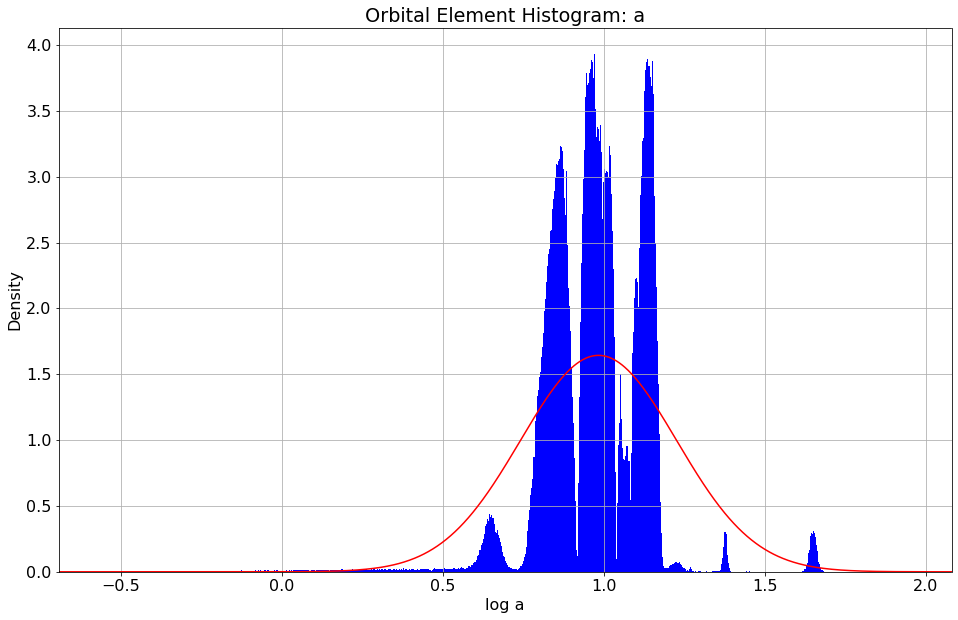

In [10]:
# Plot density of log(a)
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: a')
ax.set_xlabel('log a')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=log_a, bins=bins_log_a, density=True, cumulative=False, color='blue')
ax.plot(bins, pdf_log_a, color='red')
ax.set_xlim([log_a_min, log_a_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

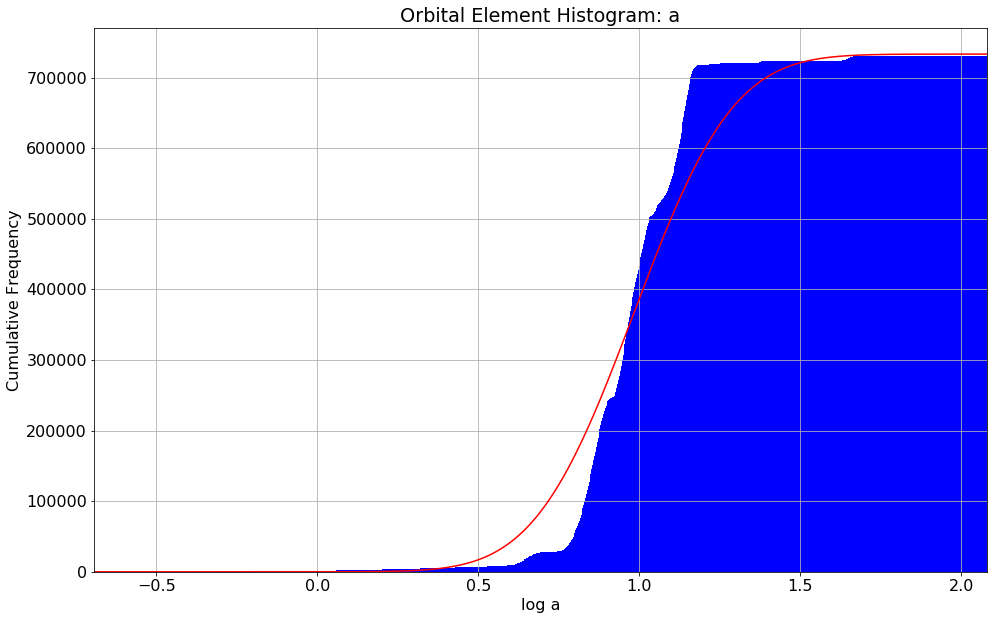

In [11]:
# Plot cumulative density of log(a)
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: a')
ax.set_xlabel('log a')
ax.set_ylabel('Cumulative Frequency')
n, bins, patches = ax.hist(x=log_a, bins=bins, density=False, cumulative=True, color='blue')
ax.plot(bins, cdf_log_a, color='red')
ax.set_xlim([log_a_min, log_a_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

## Eccentricity, e

In [12]:
# e, log(e) and moments
e = ast_elt.e.values
log_e = np.log(e)
mean_e = np.mean(e)
std_e = np.std(e)
var_e = np.var(e)

# fit beta to mean and variance
beta_a_plus_b = (mean_e) * (1-mean_e) / var_e + 1.0
beta_a = beta_a_plus_b * mean_e
beta_b = beta_a_plus_b - beta_a

In [13]:
# Bins for e
e_min = 0.0
e_max = 1.0
num_bins_e = 1001
bins_e = np.linspace(e_min, e_max, num_bins_e)

In [14]:
# Build beta PDF in scipy
beta.pdf(x=bins_e, a=beta_a, b=beta_b)

array([0.00000000e+00, 9.87056253e-03, 3.09179678e-02, ...,
       8.13171777e-35, 5.94390929e-39, 0.00000000e+00])

In [15]:
# PDF and CDF of e
pdf_e = beta.pdf(x=bins_e, a=beta_a, b=beta_b)
cdf_e = N_ast * beta.cdf(x=bins_e, a=beta_a, b=beta_b)

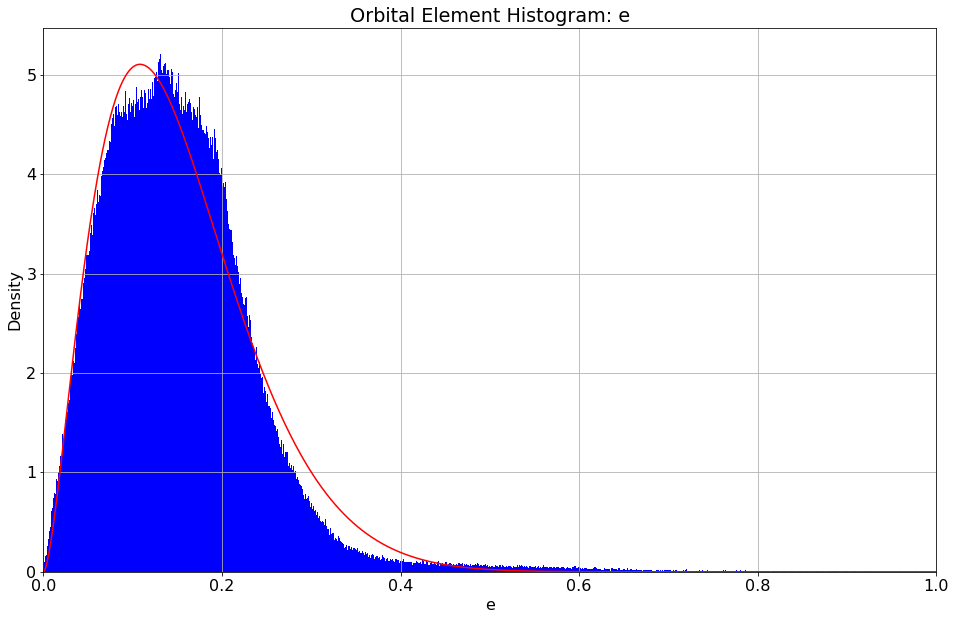

In [16]:
# Plot density of e
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: e')
ax.set_xlabel('e')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=e, bins=bins_e, density=True, cumulative=False, color='blue')
ax.plot(bins, pdf_e, color='red')
ax.set_xlim([e_min, e_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

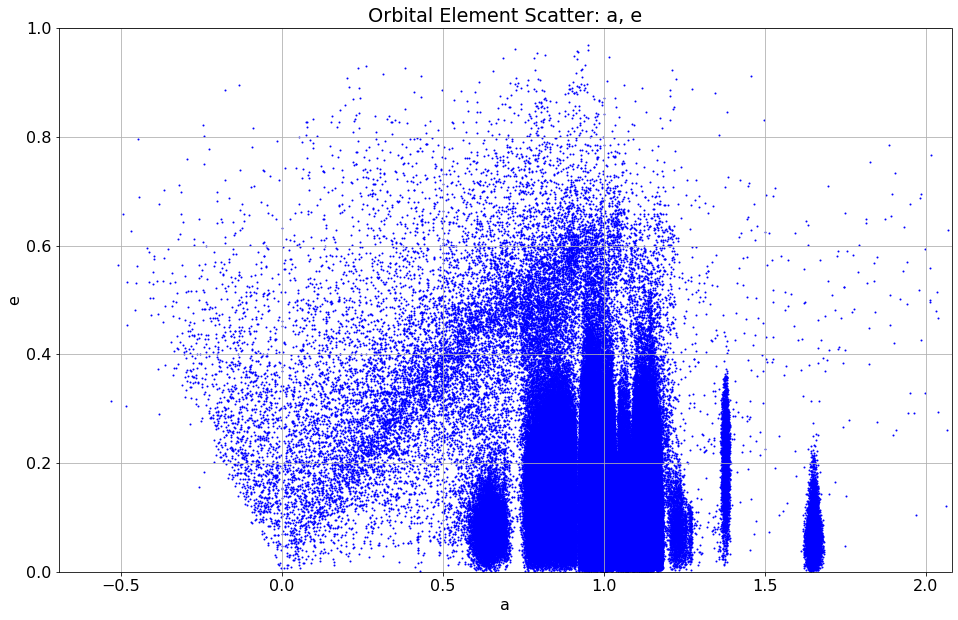

In [17]:
# Scatter Plot of a vs. e
fig, ax = plt.subplots()
ax.set_title('Orbital Element Scatter: a, e')
ax.set_xlabel('a')
ax.set_ylabel('e')
ax.set_xlim([log_a_min, log_a_max])
ax.set_ylim([0.0, 1.0])
ax.grid()
_ = ax.scatter(x=log_a, y=e, color='blue', s=1.0)

In [18]:
# Correlation coefficients for a vs. e
np.corrcoef(log_a, e)

array([[ 1.        , -0.07343772],
       [-0.07343772,  1.        ]])

## Inclination, i

In [19]:
# Extract inc
inc = ast_elt.inc.values

In [20]:
# Bins for inclination
inc_min = 0.0
inc_max = np.pi / 2.0
bins_inc = np.linspace(inc_min, inc_max, 91)

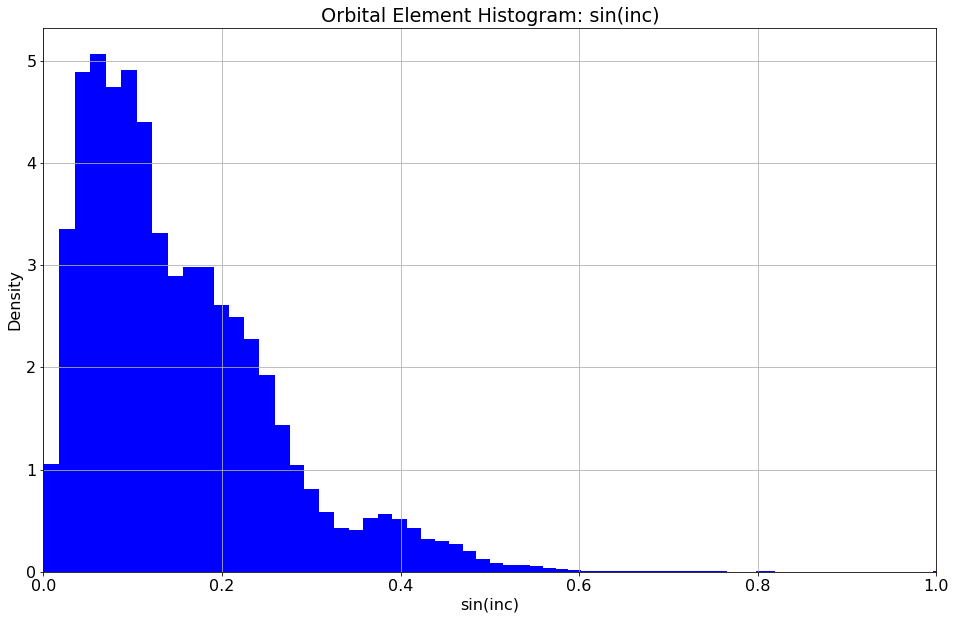

In [21]:
# Plot density of inc
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: sin(inc)')
ax.set_xlabel('sin(inc)')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=np.sin(inc), bins=np.sin(bins_inc), density=True, cumulative=False, color='blue')
# ax.plot(bins_angle, pdf_angle, color='red')
ax.set_xlim([np.sin(inc_min), np.sin(inc_max)])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

## True Anomaly, f

In [22]:
# Bins for angle variables
angle_min = 0.0
angle_max = 2.0 *np.pi
bins_angle = np.linspace(angle_min, angle_max, 361)

# Uniform density
angle_dens = 1.0 / (angle_max - angle_min)
pdf_angle = angle_dens * np.ones_like(bins_angle)

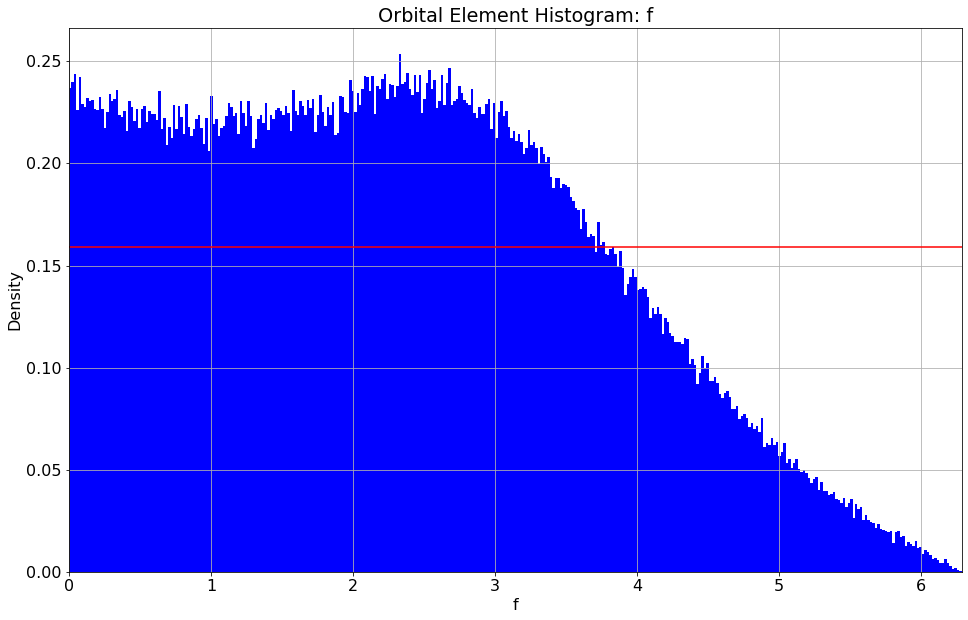

In [23]:
# Extract f
f = ast_elt.f.values

# Plot density of f
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: f')
ax.set_xlabel('f')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=f, bins=bins_angle, density=True, cumulative=False, color='blue')
ax.plot(bins_angle, pdf_angle, color='red')
ax.set_xlim([angle_min, angle_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

## Mean Anomaly, M

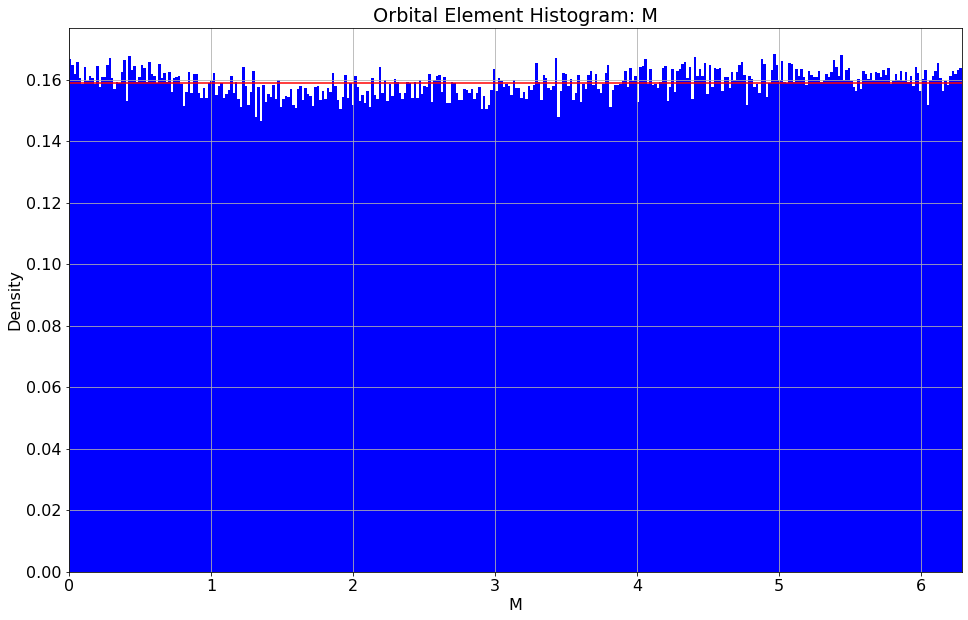

In [24]:
# Extract M
M = ast_elt.M.values

# Plot density of M
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: M')
ax.set_xlabel('M')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=M, bins=bins_angle, density=True, cumulative=False, color='blue')
ax.plot(bins_angle, pdf_angle, color='red')
ax.set_xlim([angle_min, angle_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

## Longitude of Ascending Node, Omega

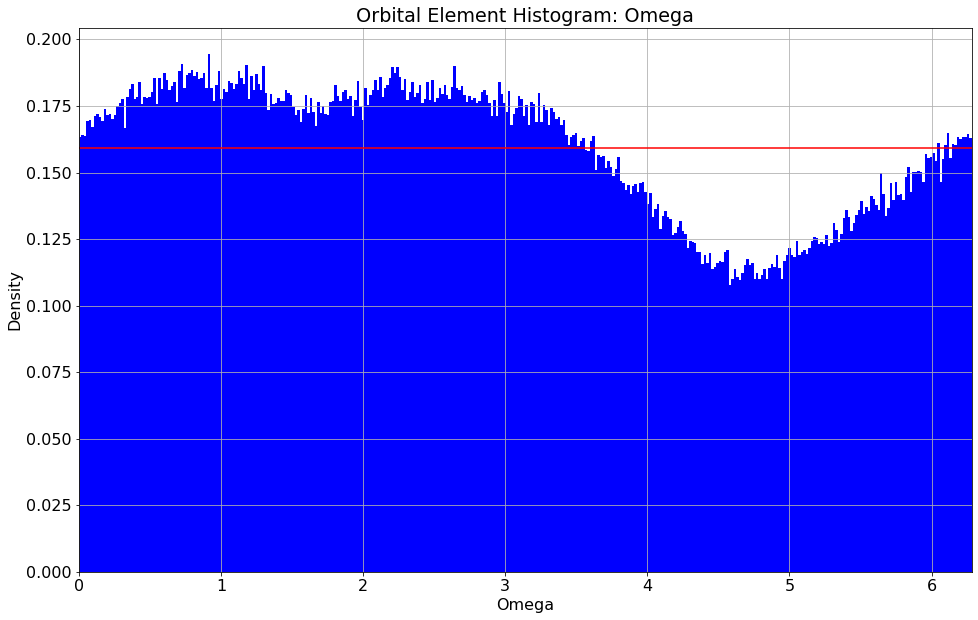

In [25]:
# Extract Omega
Omega = ast_elt.Omega.values

# Plot density of Omega
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: Omega')
ax.set_xlabel('Omega')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=Omega, bins=bins_angle, density=True, cumulative=False, color='blue')
ax.plot(bins_angle, pdf_angle, color='red')
ax.set_xlim([angle_min, angle_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

## Argument of Periapsis, omega

In [26]:
omega = ast_elt.omega.values

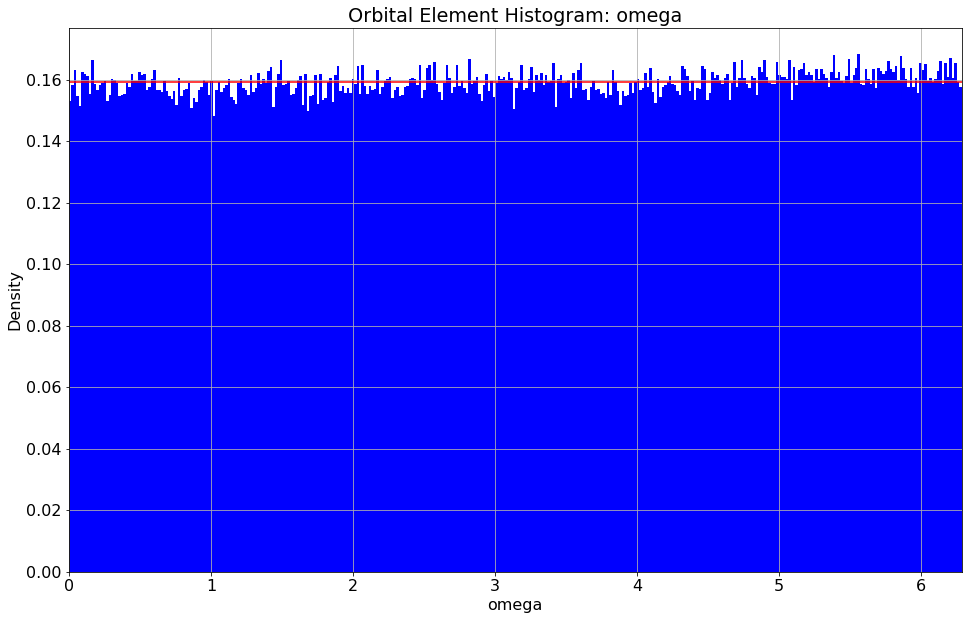

In [27]:
# Plot density of omega
fig, ax = plt.subplots()
ax.set_title('Orbital Element Histogram: omega')
ax.set_xlabel('omega')
ax.set_ylabel('Density')
n, bins, patches = ax.hist(x=omega, bins=bins_angle, density=True, cumulative=False, color='blue')
ax.plot(bins_angle, pdf_angle, color='red')
ax.set_xlim([angle_min, angle_max])
# ax.legend()
ax.grid()
# fig.savefig('../figs/elts/elt_hist_a.png', bbox_inches='tight')
plt.show()

## Randomly Sampled Elements

In [28]:
# Generate the ECDF with statsmodels
mask_a = a < 32.0
ecdf_log_a = ECDF(log_a[mask_a])

ecdf_e = ECDF(e)
ecdf_inc = ECDF(inc)
ecdf_Omega = ECDF(Omega)

In [29]:
size = 64
random_seed = 42
np.random.seed(random_seed)

# Randomly sample a, e, inc, Omega from empirical observations
a = np.random.choice(ast_elt.a, size=size)
e = np.random.choice(ast_elt.e, size=size)
inc = np.random.choice(ast_elt.inc, size=size)
Omega = np.random.choice(ast_elt.Omega, size=size)

# Sample mean anomaly M and omega randomly
two_pi = 2.0*np.pi
M = np.random.uniform(low=0.0, high=two_pi, size=size)
omega = np.random.uniform(low=0.0, high=two_pi, size=size)

# Allocate array for the true anomaly f
f = np.zeros(size)

In [30]:
# The epoch
epoch = ast_elt.epoch.values[0]

# Epoch as a datetime
epoch_dt = mjd_to_datetime(epoch)

# Base Rebound simulation of the planets and moons on this date
sim = make_sim_planets(epoch=epoch_dt)
# Set the number of active particles to the base simulation
sim.N_active = sim.N

In [31]:
for i in range(size):
        # Set the primary to the sun (NOT the solar system barycenter!)
        # Put this inside the loop b/c not guaranteed to remain constant as particles are added
        primary = sim.particles['Sun']
        # Add the new asteroid
        sim.add(m=0.0, a=a[i], e=e[i], inc=inc[i], Omega=Omega[i], omega=omega[i], M=M[i], primary=primary)
        # The asteroid that was just added
        ast = sim.particles[-1]
        # Extract the true anomaly f
        f[i] = ast.f
        # Set the hash to the asteroid's number in this batch
        ast.hash = rebound.hash(f'{i}')